Date created: Mar 11, 2022 @ 12:24

---

# Overview

This notebook takes the mysterious Aerospace building wifi data given in class and looks for something interesting. 

Initial thoughts: 

- the data is vague 
- there are only two columns, namely 'Time' and 'Connected'
- look for trends in times that people are connected

In [1]:
# imports
import numpy as np
import pandas as pd
import pickle

### Data Stuff

Do some stuff to get the data in a usable order

In [2]:
file_name = "AERO.pkl"
df = pd.read_pickle(file_name) # read the .pkl


df # print the data from pickle file 

,Time,Conncected
0,1325453,92
1,1325938,97
2,1326497,103
3,1326730,106
4,1327058,113
...,...,...
157232,67376155,98
157233,67376454,97
157234,67376757,95
157235,67377064,93


In [3]:
# convert dtype()
data = df.values.tolist()


data # print

[[1325453, 92],
 [1325938, 97],
 [1326497, 103],
 [1326730, 106],
 [1327058, 113],
 [1327371, 118],
 [1327679, 117],
 [1328049, 121],
 [1328293, 131],
 [1328595, 131],
 [1328887, 138],
 [1329198, 144],
 [1329510, 156],
 [1329794, 169],
 [1330103, 187],
 [1330420, 193],
 [1330712, 201],
 [1331053, 207],
 [1331317, 214],
 [1331648, 217],
 [1331927, 224],
 [1332254, 460],
 [1332529, 516],
 [1332855, 267],
 [1333135, 261],
 [1333460, 249],
 [1333763, 250],
 [1334088, 256],
 [1334370, 261],
 [1334676, 267],
 [1334979, 270],
 [1335281, 274],
 [1335584, 274],
 [1335886, 271],
 [1336188, 274],
 [1336520, 278],
 [1336829, 274],
 [1337239, 271],
 [1337499, 271],
 [1337791, 270],
 [1338205, 266],
 [1338560, 268],
 [1338872, 269],
 [1339277, 272],
 [1339729, 266],
 [1340056, 254],
 [1340365, 256],
 [1340620, 252],
 [1340922, 255],
 [1341256, 250],
 [1341612, 247],
 [1341897, 246],
 [1342263, 249],
 [1342551, 237],
 [1342848, 239],
 [1343175, 237],
 [1343504, 234],
 [1343792, 242],
 [1344116, 243],

We see that there are two columns. Let's start by creating some variables of some things we know about the data so far.

In [4]:
n = len(data)


n

157237

In [5]:
data[0]

[1325453, 92]

In [6]:
data[n-1]

[67377366, 93]

In [7]:
data

[[1325453, 92],
 [1325938, 97],
 [1326497, 103],
 [1326730, 106],
 [1327058, 113],
 [1327371, 118],
 [1327679, 117],
 [1328049, 121],
 [1328293, 131],
 [1328595, 131],
 [1328887, 138],
 [1329198, 144],
 [1329510, 156],
 [1329794, 169],
 [1330103, 187],
 [1330420, 193],
 [1330712, 201],
 [1331053, 207],
 [1331317, 214],
 [1331648, 217],
 [1331927, 224],
 [1332254, 460],
 [1332529, 516],
 [1332855, 267],
 [1333135, 261],
 [1333460, 249],
 [1333763, 250],
 [1334088, 256],
 [1334370, 261],
 [1334676, 267],
 [1334979, 270],
 [1335281, 274],
 [1335584, 274],
 [1335886, 271],
 [1336188, 274],
 [1336520, 278],
 [1336829, 274],
 [1337239, 271],
 [1337499, 271],
 [1337791, 270],
 [1338205, 266],
 [1338560, 268],
 [1338872, 269],
 [1339277, 272],
 [1339729, 266],
 [1340056, 254],
 [1340365, 256],
 [1340620, 252],
 [1340922, 255],
 [1341256, 250],
 [1341612, 247],
 [1341897, 246],
 [1342263, 249],
 [1342551, 237],
 [1342848, 239],
 [1343175, 237],
 [1343504, 234],
 [1343792, 242],
 [1344116, 243],

In [8]:
data[0][0]

1325453

In [9]:
data[0][1]

92

In [10]:
time = []
connections = []
iteration_count = []


for i in range(n-1):
    time.append(int(data[i][0]))
    connections.append(int(data[i][1]))
    iteration_count.append(int(i))

In [11]:
time

[1325453,
 1325938,
 1326497,
 1326730,
 1327058,
 1327371,
 1327679,
 1328049,
 1328293,
 1328595,
 1328887,
 1329198,
 1329510,
 1329794,
 1330103,
 1330420,
 1330712,
 1331053,
 1331317,
 1331648,
 1331927,
 1332254,
 1332529,
 1332855,
 1333135,
 1333460,
 1333763,
 1334088,
 1334370,
 1334676,
 1334979,
 1335281,
 1335584,
 1335886,
 1336188,
 1336520,
 1336829,
 1337239,
 1337499,
 1337791,
 1338205,
 1338560,
 1338872,
 1339277,
 1339729,
 1340056,
 1340365,
 1340620,
 1340922,
 1341256,
 1341612,
 1341897,
 1342263,
 1342551,
 1342848,
 1343175,
 1343504,
 1343792,
 1344116,
 1344433,
 1344790,
 1345146,
 1345464,
 1345752,
 1346049,
 1346371,
 1346687,
 1347026,
 1347359,
 1347702,
 1348058,
 1348410,
 1348750,
 1349091,
 1349434,
 1349750,
 1350102,
 1350451,
 1350767,
 1351104,
 1351486,
 1351834,
 1352183,
 1352506,
 1352836,
 1353172,
 1353508,
 1354091,
 1354562,
 1354875,
 1355577,
 1356611,
 1357838,
 1359344,
 1360351,
 1360839,
 1361349,
 1361911,
 1362277,
 1362657,


In [12]:
connections

[92,
 97,
 103,
 106,
 113,
 118,
 117,
 121,
 131,
 131,
 138,
 144,
 156,
 169,
 187,
 193,
 201,
 207,
 214,
 217,
 224,
 460,
 516,
 267,
 261,
 249,
 250,
 256,
 261,
 267,
 270,
 274,
 274,
 271,
 274,
 278,
 274,
 271,
 271,
 270,
 266,
 268,
 269,
 272,
 266,
 254,
 256,
 252,
 255,
 250,
 247,
 246,
 249,
 237,
 239,
 237,
 234,
 242,
 243,
 245,
 253,
 237,
 248,
 244,
 249,
 248,
 239,
 238,
 238,
 244,
 252,
 250,
 255,
 258,
 257,
 263,
 266,
 256,
 257,
 249,
 252,
 251,
 239,
 239,
 228,
 227,
 217,
 219,
 212,
 206,
 199,
 188,
 175,
 156,
 128,
 113,
 112,
 111,
 106,
 103,
 103,
 95,
 93,
 90,
 84,
 81,
 79,
 78,
 80,
 77,
 78,
 75,
 75,
 78,
 76,
 73,
 71,
 70,
 66,
 67,
 66,
 66,
 69,
 69,
 68,
 69,
 71,
 70,
 68,
 67,
 67,
 68,
 63,
 63,
 64,
 64,
 64,
 63,
 62,
 63,
 63,
 63,
 60,
 60,
 59,
 61,
 61,
 61,
 60,
 60,
 60,
 59,
 59,
 68,
 68,
 67,
 64,
 64,
 65,
 59,
 60,
 60,
 60,
 61,
 60,
 61,
 60,
 60,
 59,
 59,
 59,
 59,
 59,
 59,
 60,
 60,
 60,
 59,
 59,
 59,
 

In [13]:
iteration_count

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [14]:
ad = np.array([iteration_count, time, connections])


ad

array([[       0,        1,        2, ...,   157233,   157234,   157235],
       [ 1325453,  1325938,  1326497, ..., 67376454, 67376757, 67377064],
       [      92,       97,      103, ...,       97,       95,       93]])

In [15]:
aero_data = ad.T


aero_data

array([[       0,  1325453,       92],
       [       1,  1325938,       97],
       [       2,  1326497,      103],
       ...,
       [  157233, 67376454,       97],
       [  157234, 67376757,       95],
       [  157235, 67377064,       93]])

In [16]:
aero_data[:, 0]

array([     0,      1,      2, ..., 157233, 157234, 157235])

In [17]:
n = len(aero_data)


n

157236

### Plotting

Let's plot the data!

In [18]:
# import matplotlib to graph
import matplotlib.pyplot as plt

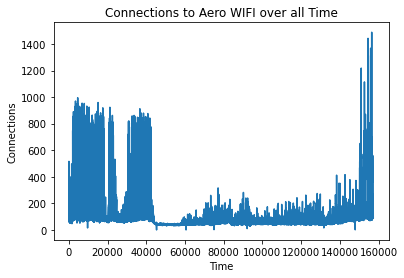

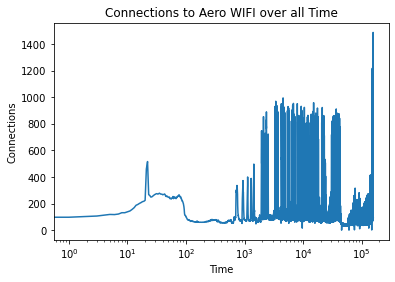

In [19]:
plt.figure() # 2D plot
plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[:, 0], aero_data[:, 2])
plt.show()

plt.figure() # 2D plot
plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.semilogx(aero_data[:, 0], aero_data[:, 2])
plt.show()

In [20]:
interval = []


for i in range(0, n-1, 20000):
    interval.append(int(i))


interval

[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000]

---From interval 0 to 20000 :


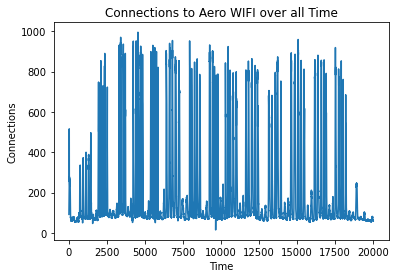

- From sub-interval 0 to 5000 :


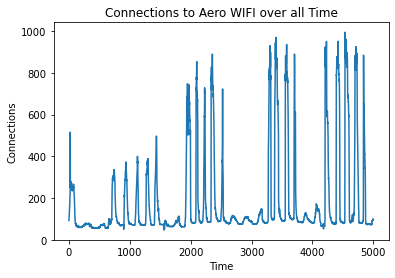

- From sub-interval 0 to 5000 :


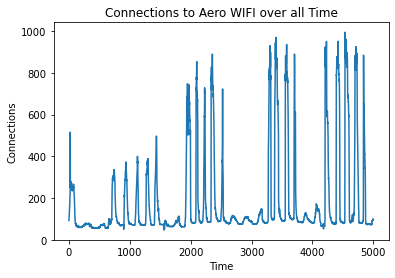

In [21]:
a = interval[0]
b = interval[1]
print('---From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[a:b, 0], aero_data[a:b, 2])
plt.show()


sub_interval = []


for i in range(a, b, 5000):
    sub_interval.append(int(i))


c = sub_interval[0]
d = sub_interval[1]
print('- From sub-interval', c, 'to', d, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[c:d, 0], aero_data[c:d, 2])
plt.show()

c = sub_interval[0]
d = sub_interval[1]
print('- From sub-interval', c, 'to', d, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[c:d, 0], aero_data[c:d, 2])
plt.show()
    

From interval 20000 to 40000 :


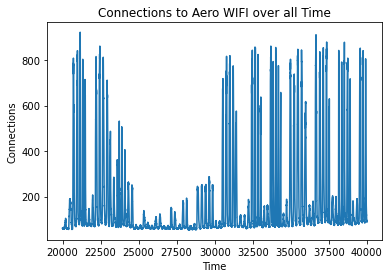

In [22]:
a = interval[1]
b = interval[2]
print('From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[a:b, 0], aero_data[a:b, 2])
plt.show()

From interval 40000 to 60000 :


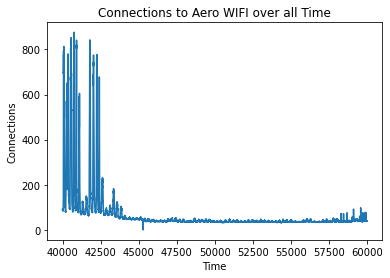

In [23]:
a = interval[2]
b = interval[3]
print('From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[a:b, 0], aero_data[a:b, 2])
plt.show()

From interval 60000 to 80000 :


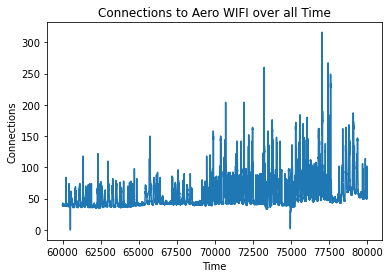

In [24]:
a = interval[3]
b = interval[4]
print('From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[a:b, 0], aero_data[a:b, 2])
plt.show()

From interval 80000 to 100000 :


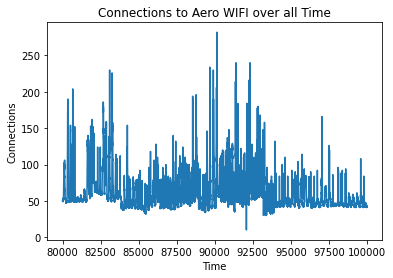

In [25]:
a = interval[4]
b = interval[5]
print('From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[a:b, 0], aero_data[a:b, 2])
plt.show()

From interval 120000 to 140000 :


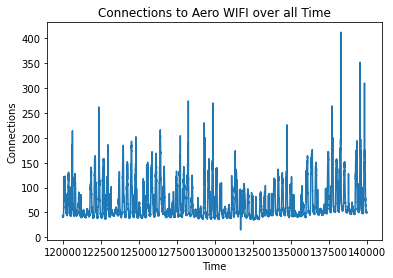

In [26]:
a = interval[6]
b = interval[7]
print('From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[a:b, 0], aero_data[a:b, 2])
plt.show()

From interval 140000 to 157236 :


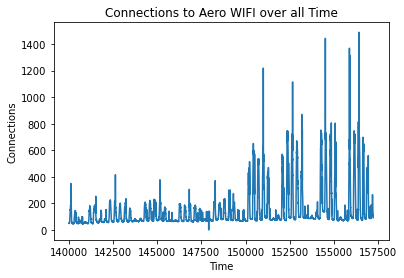

In [27]:
a = interval[7]
b = n
print('From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[a:b, 0], aero_data[a:b, 2])
plt.show()

From interval 0 to 20000 :


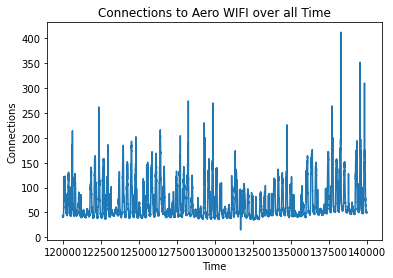

In [28]:
a = interval[0]
b = interval[1]
print('From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[120000:140000, 0], aero_data[120000:140000, 2])
plt.show()

From interval 0 to 20000 :


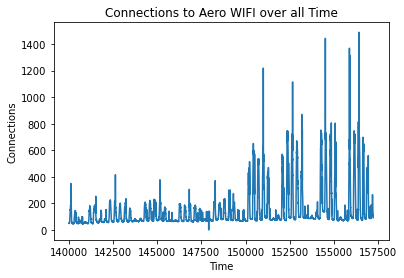

In [29]:
a = interval[0]
b = interval[1]
print('From interval', a, 'to', b, ':')


plt.title("Connections to Aero WIFI over all Time")
plt.ylabel('Connections')
plt.xlabel('Time')
plt.plot(aero_data[140000:, 0], aero_data[140000:, 2])
plt.show()

## Links

load pickle with numpy - https://numpy.org/doc/stable/reference/generated/numpy.load.html

kite; save and read .pkl as list - https://www.adamsmith.haus/python/answers/how-to-save-and-read-a-list-in-python



## References 

- Jake's AERO.pkl wifi data